In [1]:
using Revise
using Bilevel

using RigidBodyDynamics
using MeshCatMechanisms
using MeshCat
using Plots
using LinearAlgebra
using StaticArrays 

gr(size=(800,500),html_output_format=:png,
    seriescolor=:magma,background_color_legend=:white,
    background=RGB(((240,240,240) ./ 255.)...));

┌ Info: Precompiling Bilevel [9688c538-179f-11e9-3174-495cea6b7f67]
└ @ Base loading.jl:1186


HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/ac453cbe1838fe7a6d3794b312bfa72db072de98-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/ac453cbe1838fe7a6d3794b312bfa72db072de98-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

┌ Error: evaluation error
│   mod = Bilevel
│   ex = const usrfun = #= /Users/blandry/.julia/dev/Bilevel/src/solvers/snopt.jl:154 =# @cfunction(objcon_wrapper, Cvoid, (Ptr{Clong}, Ref{Clong}, Ptr{Cdouble}, Ref{Clong}, Ref{Clong}, Ptr{Cdouble}, Ref{Clong}, Ref{Clong}, Ptr{Cdouble}, Ptr{Cchar}, Ref{Clong}, Ptr{Clong}, Ref{Clong}, Ptr{Cdouble}, Ref{Clong}))
│   exception = (ErrorException("invalid lookup expr (\$(QuoteNode(Core.svec)))(JuliaInterpreter.SSAValue(2), JuliaInterpreter.SSAValue(3), JuliaInterpreter.SSAValue(4), JuliaInterpreter.SSAValue(5), JuliaInterpreter.SSAValue(6), JuliaInterpreter.SSAValue(7), JuliaInterpreter.SSAValue(8), JuliaInterpreter.SSAValue(9), JuliaInterpreter.SSAValue(10), JuliaInterpreter.SSAValue(11), JuliaInterpreter.SSAValue(12), JuliaInterpreter.SSAValue(13), JuliaInterpreter.SSAValue(14), JuliaInterpreter.SSAValue(15), JuliaInterpreter.SSAValue(16))"), Union{Ptr{Nothing}, InterpreterIP}[Ptr{Nothing} @0x000000010d2b1572, Ptr{Nothing} @0x000000010d28871d, 

# Contact

## Single point with contact

In [2]:
urdf = joinpath("..", "urdf", "ball.urdf")
mechanism = parse_urdf(Float64, urdf)

floor = findbody(mechanism, "floor")
point = Point3D(default_frame(floor), SVector([0.,0.,0.]...))
normal = FreeVector3D(default_frame(floor), SVector([0.,0.,1.]...))
floor_obs = Obstacle(floor, point, normal, :xyz, 1.)

obstacles = [floor_obs]
env = Environment(mechanism, urdf, obstacles)

Environment(Contact[Contact(Spanning tree:
Vertex: world (root)
  Vertex: floor, Edge: floor_to_world
    Vertex: ball, Edge: floor_to_ball
No non-tree joints., ball, Point3D in "after_floor_to_ball": [0.0, 0.0, 0.0], Obstacle(floor, Point3D in "after_floor_to_world": [0.0, 0.0, 0.0], FreeVector3D in "after_floor_to_world": [0.0, 0.0, 1.0], [1.0 6.12323e-17 -1.0 -1.83697e-16; 0.0 1.0 1.22465e-16 -1.0; 0.0 0.0 0.0 0.0], 1.0, false))])

In [30]:
N = 10
Δt = 0.1
q0 = [1., 0., 0., 0., 0., 0., 0.]
v0 = [0., 0., 0., 5., 0., 0.] 

sim_data = get_sim_data_indirect(mechanism,env,Δt)
null_ctrl! = (u,t,x) -> u[:] .= 0.
x0 = MechanismState(mechanism)
set_configuration!(x0, q0)
set_velocity!(x0, v0)
setdirty!(x0)
traj = Bilevel.simulate(sim_data,null_ctrl!,x0,N)

(Array{Float64,1}[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, -6.657e-17, -8.88178e-17, 0.4019, 0.0, 3.46945e-18], [1.0, 0.0, -6.66134e-17, -8.88178e-17, 0.7057, 0.0, 3.46945e-18], [1.0, 0.0, -6.66134e-17, -8.88178e-17, 0.9114, 0.0, 3.46945e-18], [1.0, 0.0, -6.66134e-17, -8.88178e-17, 1.019, 0.0, 3.46945e-18], [1.0, 0.0, -6.66134e-17, -8.88178e-17, 1.0285, 0.0, 3.46945e-18], [1.0, 0.0, -6.66134e-17, 0.0, 1.0285, -2.9976e-19, 3.46945e-18], [1.0, 0.0, -6.66134e-17, 0.0, 1.0285, 1.45403e-26, 3.46945e-18], [1.0, 0.0, -6.66134e-17, 0.0, 1.0285, 1.45403e-26, 3.46945e-18], [1.0, 0.0, -6.66134e-17, 0.0, 1.0285, 1.45403e-26, 3.46945e-18]], Array{Float64,1}[[0.0, 0.0, 0.0, 5.0, 0.0, 0.0], [0.0, -1.33227e-15, 0.0, 4.019, 0.0, -5.00397e-16], [0.0, -1.33227e-15, 0.0, 3.038, 0.0, -4.74216e-16], [0.0, -1.33227e-15, 0.0, 2.057, 0.0, -2.39269e-16], [0.0, -1.33227e-15, 0.0, 1.076, 0.0, -2.12825e-16], [0.0, -1.33227e-15, 0.0, 0.095, 0.0, 2.21217e-17], [0.0, -1.33227e-15, 0.0, -1.00166e-25, -2.9976e-1

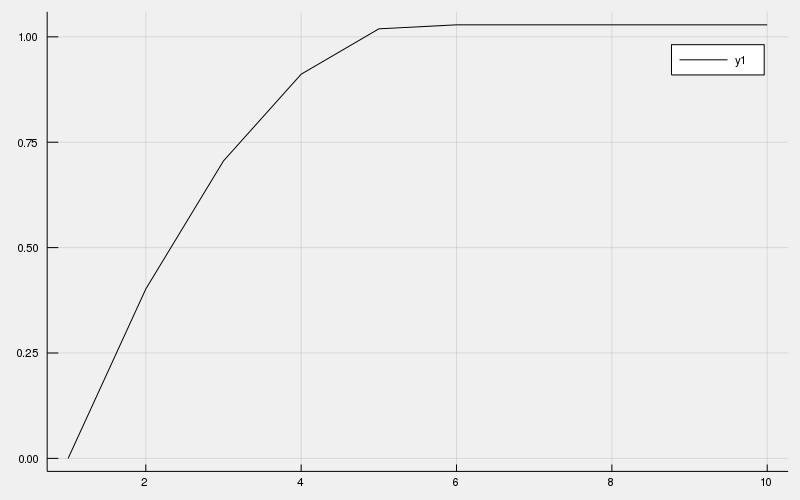

In [31]:
plot(traj[7][5,:])

In [32]:
q1 = [1., 0., 0., 0., 0., 0., 0.]
qN = [1., 0., 0., 0., 1., 0., 0.]
N = 10
Δt = .1

q_min = [-1., -1., -1., -1., -5., -5., -5.]
q_max = [1., 1., 1., 1., 5., 5., 5.]

function get_prob_limits(sim_data)
    x_min = -1e19*ones(sim_data.vs.num_vars)
    x_max = 1e19*ones(sim_data.vs.num_vars)
    
    # joint limits
    add_box_con_snopt!(x_min, x_max, sim_data, :q, q_min, q_max, 1:N)
    add_box_con_snopt!(x_min, x_max, sim_data, :h, [Δt], [Δt], 1:N-1)
    
    # torques limits
    add_box_con_snopt!(x_min, x_max, sim_data, :u, zeros(num_velocities(mechanism)), zeros(num_velocities(mechanism)), 1:N-1)

    x_min, x_max
end

function add_prob_constraints!(sim_data)
    vs = sim_data.vs

    add_eq!(sim_data, :cq1, length(q1), x -> vs(x, :q1) - q1)
    add_eq!(sim_data, :cqN, length(qN), x -> vs(x, Symbol("q", N)) - qN)
    add_eq!(sim_data, :cv1, 1, x -> vs(x, :v1)[6])
    add_eq!(sim_data, :cvN, 1, x -> vs(x, Symbol("v", N))[4])
end

add_prob_constraints! (generic function with 1 method)

In [43]:
sim_data = get_trajopt_data_indirect(mechanism,env,Δt,N,relax_comp=false)
add_prob_constraints!(sim_data)
x_min, x_max = get_prob_limits(sim_data)
traj_indirect = Bilevel.trajopt(sim_data, x_min=x_min, x_max=x_max, quaternion_state=true, verbose=1)

The problem appears to be infeasible: nonlinear infeasibilities minimized


(Array{Float64,1}[[1.0, 0.0, -1.42429e-18, 0.0, 3.75767e-17, -7.33205e-18, 0.0], [0.620911, 1.83032e-6, 0.783881, -1.17692e-6, -1.69496e-15, 1.13771e-14, 1.95746e-16], [-0.228939, 2.27294e-6, 0.973441, -1.46152e-6, 9.655e-15, -1.27873e-14, 1.30021e-15], [0.670769, -1.34291e-6, 0.741666, -4.08516e-6, 3.64701e-14, -1.30056e-14, 5.73044e-14], [0.837126, -9.60168e-7, 0.547009, -4.54225e-6, 0.269214, -9.88038e-7, -5.5198e-18], [0.944286, -7.98374e-7, 0.329126, -4.08658e-6, 0.515379, -1.43017e-6, 0.0193076], [0.990621, -2.0439e-7, 0.136636, -3.34545e-6, 0.726728, -1.49244e-6, 0.0332085], [0.999913, -9.64121e-8, 0.0131759, -1.81717e-6, 0.924742, -9.38841e-7, -1.29878e-18], [0.999983, -5.19441e-8, -0.00587383, -8.32444e-7, 1.0, -1.96772e-14, -2.63947e-17], [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, -2.41916e-27]], Array{Float64,1}[[5.8956e-5, 25.2494, -3.79094e-5, 0.365717, 0.0954018, 0.0], [5.8956e-5, 25.2494, -3.79094e-5, 1.95993e-12, 2.42417e-13, 2.11572e-13], [5.8956e-5, 25.2494, -3.79094e-5, -7.98458

In [35]:
sim_data = get_trajopt_data_semidirect(mechanism,env,Δt,N,relax_comp=false)
add_prob_constraints!(sim_data)
x_min, x_max = get_prob_limits(sim_data)
traj_semidirect = Bilevel.trajopt(sim_data, x_min=x_min, x_max=x_max, quaternion_state=true, verbose=1)

Terminated after numerical difficulties: singular basis


(Array{Float64,1}[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.85193e-16], [0.999775, -9.5072e-25, -0.0212328, 1.42021e-23, 0.183329, -3.49828e-5, -1.46298e-15], [0.999099, -1.90016e-24, -0.0424369, 0.0, 0.358329, -4.68552e-5, 0.163632], [0.997976, -1.26535e-24, -0.0635839, 1.24543e-22, 0.520829, -5.85475e-5, 0.229163], [0.996411, -1.5792e-24, -0.0846455, -6.21737e-23, 0.666661, -7.00729e-5, 0.196595], [0.994409, -1.26082e-24, -0.105594, 1.24098e-22, 0.791659, -8.14485e-5, 0.0659267], [0.991979, -2.51549e-24, -0.126404, 6.18972e-23, 0.891663, -6.12137e-5, 0.196595], [0.989129, 0.0, -0.147047, 1.23439e-22, 0.962499, -4.08732e-5, 0.229163], [0.985872, 0.0, -0.1675, 1.23032e-22, 1.0, -2.04571e-5, 0.163632], [0.982219, 0.0, -0.18774, 1.22576e-22, 1.0, 0.0, 0.0]], Array{Float64,1}[[-2.14505e-23, -0.424752, -2.53054e-22, 1.87494, -0.000437646, 3.87355e-15], [-2.06541e-23, -0.424752, -2.14505e-22, 1.83329, -0.000349828, -6.84025e-15], [-1.36757e-23, -0.424752, 0.0, 1.75, -0.000118723, 1.63632], [-2.8662

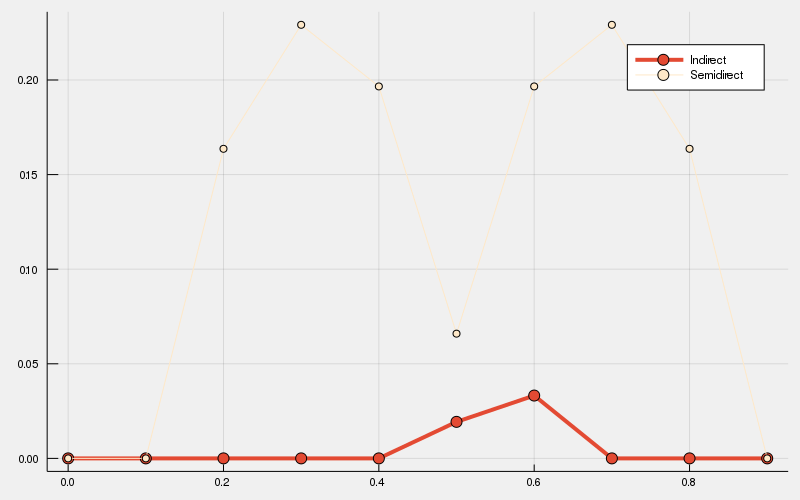

In [44]:
j = 7
plot(traj_indirect[7],traj_indirect[8][j,:],label="Indirect",seriescolor=RGB(((227,74,51) ./ 255.)...),linewidth=4,marker=6)
plot!(traj_semidirect[7],traj_semidirect[8][j,:],label="Semidirect",seriescolor=RGB(((254,232,200) ./ 255.)...),linewidth=0,marker=4)

# Box with four contact

In [45]:
μ_floor = .1

urdf = joinpath("..", "urdf", "box.urdf")
mechanism = parse_urdf(Float64, urdf)

floor = findbody(mechanism, "floor")
point = Point3D(default_frame(floor), SVector([0.,0.,0.]...))
normal = FreeVector3D(default_frame(floor), SVector([0.,0.,1.]...))
floor_obs = Obstacle(floor, point, normal, :xyz, μ_floor)

obstacles = [floor_obs]
env = Environment(mechanism, urdf, obstacles);

In [46]:
Δt = 0.1
N = 10

x0 = MechanismState(mechanism)
set_configuration!(x0,[1.,0.,0.,0.,0.,0.,0.25])
set_velocity!(x0,[0.,0.,0.,.75,0.,0.])
setdirty!(x0)

sim_data = get_sim_data_indirect(mechanism,env,Δt)

null_ctrl! = (u,t,x) -> u[:] .= 0.
traj_sim = Bilevel.simulate(sim_data,null_ctrl!,x0,N)

(Array{Float64,1}[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25], [1.0, -2.33856e-13, 5.77351e-12, 1.73835e-13, 0.06519, 1.11892e-14, 0.25], [1.0, 2.33868e-13, -4.42214e-17, 3.40924e-14, 0.12057, 2.82264e-14, 0.25], [1.0, -2.33862e-13, -2.70737e-17, 1.1731e-15, 0.16614, 4.10496e-15, 0.25], [1.0, 2.33916e-13, 1.37703e-16, 4.79904e-14, 0.2019, 2.57306e-15, 0.25], [1.0, -2.33902e-13, -1.53131e-16, 4.72812e-17, 0.22785, 9.67919e-16, 0.25], [1.0, 2.33855e-13, 1.7963e-16, 4.68298e-14, 0.24399, 2.78226e-15, 0.25], [1.0, -2.33881e-13, -1.16755e-16, 1.03662e-17, 0.25032, 9.22335e-16, 0.25], [1.0, 2.33893e-13, -1.78179e-10, -9.15414e-11, 0.25032, 4.56538e-11, 0.25], [1.0, -2.47553e-13, -1.07933e-11, -1.30653e-10, 0.25032, 6.53204e-11, 0.25]], Array{Float64,1}[[0.0, 0.0, 0.0, 0.75, 0.0, 0.0], [-4.67711e-12, 1.1547e-10, -2.73483e-13, 0.6519, 5.16445e-14, 3.63716e-11], [4.67737e-12, -1.15471e-10, 9.55331e-13, 0.5538, -6.37027e-15, -3.04109e-11], [-4.67725e-12, -5.41473e-16, 2.3462e-14, 0.4557, 1.50488e-14, 3

In [47]:
mvis = MechanismVisualizer(mechanism, URDFVisuals(urdf))
open(mvis)

┌ Info: Serving MeshCat visualizer at http://127.0.0.1:8700
└ @ MeshCat /Users/blandry/.julia/packages/MeshCat/WlA0B/src/servers.jl:24


Process(`open http://127.0.0.1:8700`, ProcessExited(0))

In [48]:
setanimation!(mvis, traj_sim[6], traj_sim[1])

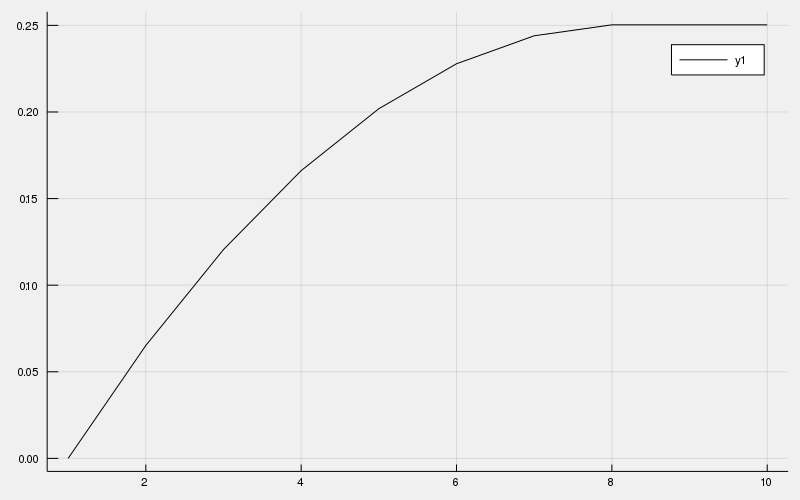

In [49]:
plot(traj_sim[7][5,:])

In [50]:
q1 = [1., 0., 0., 0., 0., 0., 0.25]
qN = [1., 0., 0., 0., .25, 0., 0.25]
N = 10
Δt = 0.1

q_min = [1., 0., 0., 0., -5., -5., -5.]
q_max = [1., 0., 0., 0., 5., 5., 5.]

function get_prob_limits(sim_data)
    x_min = -1e19*ones(sim_data.vs.num_vars)
    x_max = 1e19*ones(sim_data.vs.num_vars)
    
    # joint limits
    add_box_con_snopt!(x_min, x_max, sim_data, :q, q_min, q_max, 1:N)
    add_box_con_snopt!(x_min, x_max, sim_data, :h, [.9 * Δt], [1.1 * Δt], 1:N-1)
    
    # torques limits
    add_box_con_snopt!(x_min, x_max, sim_data, :u, zeros(num_velocities(mechanism)), zeros(num_velocities(mechanism)), 1:N-1)

    x_min, x_max
end

function get_prob_init(sim_data)
    x0 = zeros(sim_data.vs.num_vars)
    for n = 1:N
       x0[sim_data.vs(Symbol("q", n))] = n/N * (qN - q1) + q1 
    end
end

function add_prob_constraints!(sim_data)
    vs = sim_data.vs

    add_eq!(sim_data, :cq1, length(q1), x -> vs(x, :q1) - q1)
    add_eq!(sim_data, :cqN, length(qN), x -> vs(x, Symbol("q", N)) - qN)
    add_eq!(sim_data, :cv1, 1, x -> vs(x, :v1)[6])
    add_eq!(sim_data, :cvN, 1, x -> vs(x, Symbol("v", N))[4])
end

add_prob_constraints! (generic function with 1 method)

In [51]:
sim_data = get_trajopt_data_indirect(mechanism,env,Δt,N,relax_comp=false)
add_prob_constraints!(sim_data)
x_min, x_max = get_prob_limits(sim_data)
x0 = get_prob_init(sim_data)
traj_indirect = Bilevel.trajopt(sim_data, x0=x0, x_min=x_min, x_max=x_max, quaternion_state=true, verbose=1)

Finished successfully: optimality conditions satisfied


(Array{Float64,1}[[1.0, 0.0, 0.0, 0.0, 1.83277e-13, 0.0, 0.25], [1.0, 0.0, 0.0, 0.0, 0.0594676, 7.49577e-14, 0.25], [1.0, 0.0, 0.0, 0.0, 0.110989, 5.24571e-14, 0.25], [1.0, 0.0, 0.0, 0.0, 0.159167, 8.53749e-14, 0.25], [1.0, 0.0, 0.0, 0.0, 0.193738, 1.09743e-13, 0.25], [1.0, 0.0, 0.0, 0.0, 0.22263, 9.51098e-14, 0.25], [1.0, 0.0, 0.0, 0.0, 0.240288, 5.58654e-14, 0.25], [1.0, 0.0, 0.0, 0.0, 0.25, -8.16749e-15, 0.25], [1.0, 0.0, 0.0, 0.0, 0.25, 6.89505e-14, 0.25], [1.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25]], Array{Float64,1}[[0.000819837, -0.00185979, 8.19837e-5, 0.749041, -7.79857e-13, 4.96356e-14], [3.8164e-13, 1.33187e-12, -6.81104e-19, 0.660751, -3.60556e-13, -3.88345e-13], [-1.30017e-12, 7.0524e-13, -7.10316e-22, 0.572461, -2.50007e-13, -4.5837e-13], [3.31929e-13, 8.15974e-13, -7.12566e-22, 0.472408, 2.70113e-13, -6.43141e-13], [9.67963e-17, 6.58251e-13, -4.82082e-22, 0.384118, 2.70758e-13, 9.98795e-13], [-2.13042e-23, 1.66107e-23, 4.80802e-27, 0.28449, -6.32782e-13, 1.00245e-12], [7.56359

In [54]:
setanimation!(mvis, traj_indirect[7], traj_indirect[1])

In [ ]:
sim_data = get_trajopt_data_semidirect(mechanism,env,Δt,N,relax_comp=false)
add_prob_constraints!(sim_data)
x_min, x_max = get_prob_limits(sim_data)
x0 = get_prob_init(sim_data)
traj_semidirect = Bilevel.trajopt(sim_data, x0=x0, x_min=x_min, x_max=x_max, quaternion_state=true, verbose=1)

In [ ]:
setanimation!(mvis, traj_semidirect[7], traj_semidirect[1])

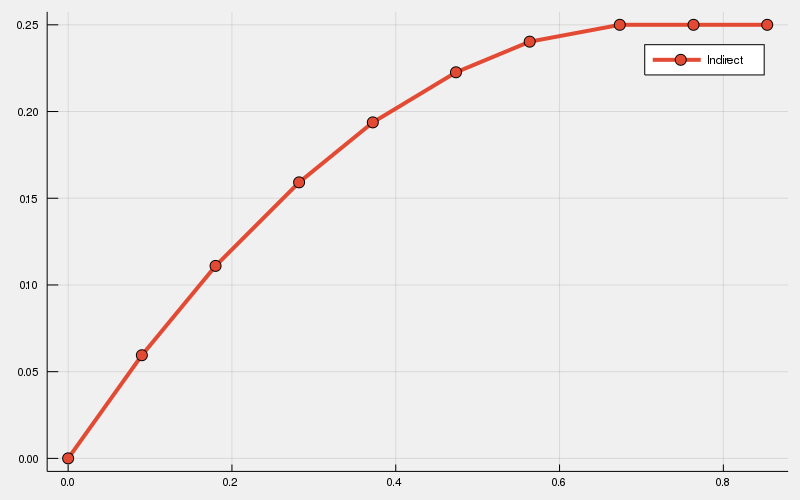

In [52]:
j = 5
plot(traj_indirect[7],traj_indirect[8][j,:],label="Indirect",seriescolor=RGB(((227,74,51) ./ 255.)...),linewidth=4,marker=6)
plot!(traj_semidirect[7],traj_semidirect[8][j,:],label="Semidirect",seriescolor=RGB(((254,232,200) ./ 255.)...),linewidth=0,marker=4)

## Little dog

In [2]:
urdf = joinpath("..", "urdf", "little_dog", "little_dog_2d.urdf")
mechanism = parse_urdf(Float64, urdf)

floor = findbody(mechanism, "floor")
point = Point3D(default_frame(floor), SVector([0.,0.,0.]...))
normal = FreeVector3D(default_frame(floor), SVector([0.,0.,1.]...))
floor_obs = Obstacle(floor, point, normal, :xyz, 1.)

obstacles = [floor_obs]
env = Environment(mechanism, urdf, obstacles);

In [ ]:
N = 10
Δt = 0.1
q0 = [0., -.175, 0., 0., 0., 0., 0., .036, 0., 0., 0., .00758, 0., .002445, 0.]  
v0 = zeros(num_velocities(mechanism))

sim_data = get_sim_data_indirect(mechanism,env,Δt)
null_ctrl! = (u,t,x) -> u[:] .= 0.
x0 = MechanismState(mechanism)
set_configuration!(x0, q0)
set_velocity!(x0, v0)
setdirty!(x0)
traj = Bilevel.simulate(sim_data,null_ctrl!,x0,N)

In [3]:
mvis = MechanismVisualizer(mechanism, URDFVisuals(urdf));
# open(mvis)
IJuliaCell(mvis)

WebIO.Scope("scope-880fa889-9a4a-4652-a9b7-ebec90887a7d", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :iframe), Any[], Dict{Symbol,Any}(:attributes=>Dict{String,Any}("height"=>"100%","scrolling"=>"no","src"=>"javascript:void(0)","frameborder"=>0),:id=>"ifr",:style=>Dict("width"=>"100%","flexGrow"=>"1")), 0)], Dict{Symbol,Any}(:style=>Dict("flexDirection"=>"column","height"=>"100%","minHeight"=>"400px","display"=>"flex","width"=>"100%","overflow"=>"hidden")), 1), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}(), Set(String[]), nothing, Any[], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function () {\n    var frame = this.dom.querySelector(\"#ifr\");\n    var doc = frame.contentDocument\n    var win = frame.contentWindow\n\n    // Ensure that the iframe's baseURI matches the baseURI of the\n    // outer document. This is necessary to resolve\n    // https://github.com/JuliaGizmos/WebIO.jl/issues/167\n    var base = doc.createElement(\"base\");\n    base.setAttribute(\"href\", document.baseURI);\n    doc.head.appendChild(base);\n\n    var webio = doc.createElement(\"script\")\n    webio.src = \"/assetserver/b464848323e0a4c9a3cfe11f8edca2932188b6d9-assets/webio/dist/bundle.js\"\n    var parent = window\n\n    function resizeIframe() {\n        doc.body.style.padding = '0'\n        doc.body.style.margin = '0'\n        doc.documentElement.height = '100%'\n        doc.body.height = '100%'\n    }\n\n    webio.onload = function () {\n        win.WebIO.sendCallback = parent.WebIO.sendCallback; // Share stuff\n        win.WebIO.scopes = parent.WebIO.scopes\n        win.WebIO.obsscopes = parent.WebIO.obsscopes\n        win.WebIO._connected = true\n        doc.body.innerHTML = \"<html><body>\" + \"<div class='display:none'></div><unsafe-script style='display:none'>\\nWebIO.mount(this.previousSibling,{&quot;props&quot;:{},&quot;nodeType&quot;:&quot;Scope&quot;,&quot;type&quot;:&quot;node&quot;,&quot;instanceArgs&quot;:{&quot;imports&quot;:{&quot;data&quot;:[{&quot;name&quot;:null,&quot;type&quot;:&quot;js&quot;,&quot;url&quot;:&quot;/assetserver/cff5eb7af79db7e6d407febf164549a9fdb258cd-main.min.js&quot;}],&quot;type&quot;:&quot;async_block&quot;},&quot;id&quot;:&quot;scope-e0bd907a-fad0-4bb9-a0ee-67e52fad0281&quot;,&quot;handlers&quot;:{&quot;meshcat-command&quot;:[(function (val){return this.viewer.handle_command_message({&quot;data&quot;:val})})],&quot;_promises&quot;:{&quot;importsLoaded&quot;:[(function (mc){var element=this.dom.children[0]; this.viewer=new mc.Viewer(element); WebIO.setval({&quot;name&quot;:&quot;meshcat-request&quot;,&quot;scope&quot;:&quot;scope-e0bd907a-fad0-4bb9-a0ee-67e52fad0281&quot;,&quot;id&quot;:&quot;ob_02&quot;,&quot;type&quot;:&quot;observable&quot;},String(Date.now())); window.document.body.style.margin=&quot;0&quot;; return window.meshcat_viewer=this.viewer})]}},&quot;systemjs_options&quot;:null,&quot;observables&quot;:{&quot;meshcat-command&quot;:{&quot;sync&quot;:false,&quot;id&quot;:&quot;ob_01&quot;,&quot;value&quot;:[131,166,109,97,116,114,105,120,199,64,23,0,0,128,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,63,0,0,0,0,0,0,0,0,0,0,0,0,7,206,153,189,0,0,128,63,164,116,121,112,101,173,115,101,116,95,116,114,97,110,115,102,111,114,109,164,112,97,116,104,218,0,82,47,109,101,115,104,99,97,116,47,119,111,114,108,100,47,102,108,111,111,114,47,98,111,100,121,47,98,97,99,107,95,114,105,103,104,116,95,104,105,112,47,98,97,99,107,95,114,105,103,104,116,95,117,112,112,101,114,95,108,101,103,47,98,97,99,107,95,114,105,103,104,116,95,108,111,119,101,114,95,108,101,103]},&quot;meshcat-controls&quot;:{&quot;sync&quot;:true,&quot;id&quot;:&quot;ob_03&quot;,&quot;value&quot;:[]},&quot;meshcat-request&quot;:{&quot;sync&quot;:true,&quot;id&quot;:&quot;ob_02&quot;,&quot;value&quot;:&quot;&quot;}}},&quot;children&quot;:[{&quot;props&quot;:{&quot;className&quot;:&quot;meshcat-viewer&quot;,&quot;style&quo

In [ ]:
using Pkg
Pkg.status()

In [ ]:
setanimation!(mvis, traj[6], traj[1])

In [4]:
widget = manipulate!(mvis)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Observable{Any} with 1 listeners. Value:
nothing], Dict{Symbol,Any}(), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-60477376-ae8e-431d-a853-b657c3577bb1", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["floor_to_body.q1"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>629,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
315, nothing)), Set(String[]), nothing, Any["knockout"=>"/home/blandry/.julia/packages/Knockout/JE2Yq/src/../assets/knockout.js", "knockout_punches"=>"/home/blandry/.julia/packages/Knockout/JE2Yq/src/../assets/knockout_punches.js", "/home/blandry/.julia/packages/InteractBase/R8JgH/src/../assets/style.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-3.14159\",\"-3.13159\",\"-3.12158\",\"-3.11158\",\"-3.10157\",\"-3.09157\",\"-3.08156\",\"-3.07156\",\"-3.06155\",\"-3.05155\",\"-3.04154\",\"-3.03154\",\"-3.02153\",\"-3.01153\",\"-3.00152\",\"-2.99152\",\"-2.98151\",\"-2.97151\",\"-2.9615\",\"-2.9515\",\"-2.94149\",\"-2.93149\",\"-2.92148\",\"-2.91148\",\"-2.90147\",\"-2.89147\",\"-2.88146\",\"-2.87146\",\"-2.86145\",\"-2.85145\",\"-2.84144\",\"-2.83144\",\"-2.82143\",\"-2.81143\",\"-2.80142\",\"-2.79142\",\"-2.78141\",\"-2.7714\",\"-2.7614\",\"-2.75139\",\"-2.74139\",\"-2.73138\",\"-2.72138\",\"-2.71137\",\"-2.70137\",\"-2.69136\",\"-2.68136\",\"-2.67135\",\"-2.66135\",\"-2.65134\",\"-2.64134\",\"-2.63133\",\"-2.62133\",\"-2.61132\",\"-2.60132\",\"-2.59131\",\"-2.58131\",\"-2.5713\",\"-2.5613\",\"-2.55129\",\"-2.54129\",\"-2.53128\",\"-2.52128\",\"-2.51127\",\"-2.50127\",\"-2.49126\",\"-2.48126\",\"-2.47125\",\"-2.46125\",\"-2.45124\",\"-2.44124\",\"-2.43123\",\"-2.42123\",\"-2.41122\",\"-2.40122\",\"-2.39121\",\"-2.38121\",\"-2.3712\",\"-2.3612\",\"-2.35119\",\"-2.34119\",\"-2.33118\",\"-2.32118\",\"-2.31117\",\"-2.30117\",\"-2.29116\",\"-2.28116\",\"-2.27115\",

MethodError: no method matching size(::SArray{Tuple{3},Float64,1,3})
The applicable method may be too new: running in world age 25581, while current world is 25982.
Closest candidates are:
  size(::Union{Adjoint{T,#s15} where #s15<:Union{StaticArray{Tuple{#s12},T,1} where #s12, StaticArray{Tuple{#s13,#s14},T,2} where #s14 where #s13}, Diagonal{T,#s18} where #s18<:(StaticArray{Tuple{#s19},T,1} where #s19), Hermitian{T,#s17} where #s17<:(StaticArray{Tuple{T,M},T1,2} where T1 where M), Symmetric{T,#s16} where #s16<:(StaticArray{Tuple{T,M},T1,2} where T1 where M), Transpose{T,#s12} where #s12<:Union{StaticArray{Tuple{#s12},T,1} where #s12, StaticArray{Tuple{#s13,#s14},T,2} where #s14 where #s13}, StaticArray{Tuple{#s19},T,1} where #s19, StaticArray{Tuple{#s14,#s13},T,2} where #s13 where #s14, StaticArray{#s19,T,N} where N where #s19<:Tuple} where T) at /home/blandry/.julia/packages/StaticArrays/VyRz3/src/abstractarray.jl:9 (method too new to be called from this world context.)
  size(::Uni

In [ ]:
q_nom = [0., -.175, 0., 0., 0., 0., 0., .036, 0., 0., 0., .00758, 0., .002445, 0.] 
q_min = [-5., -.25, -2*pi, -.6, -.6, -.6, -.6, -3.5, -3.5, -3.5, -3.5, -3.1, -3.1, -3.1, -3.1]
q_max = [5., -.1, 2*pi, .6, .6, .6, .6, 2.4, 2.4, 2.4, 2.4, 1., 1., 1., 1.]

N = 20
Δt = .1

function add_prob_constraints!(sim_data)
    vs = sim_data.vs

    add_eq!(sim_data, :cq1, num_positions(mechanism), x -> vs(x, :q1) - q_nom)
    add_eq!(sim_data, :cv1, num_velocities(mechanism), x -> vs(x, :v1))
    
    # final position
    add_eq!(sim_data, :cqN, 2, x -> vs(x, Symbol("q", N))[1:2] - [.1, -.175])
end

function add_prob_obj!(sim_data)
    for n = 1:N
        add_obj!(sim_data, Symbol("u", n), x -> sim_data.vs(x, Symbol("u", n))' * sim_data.vs(x, Symbol("u", n)))
    end
end

function get_prob_limits(sim_data)
    x_min = -1e19*ones(sim_data.vs.num_vars)
    x_max = 1e19*ones(sim_data.vs.num_vars)
    
    # joint limits
    add_box_con_snopt!(x_min, x_max, sim_data, :q, q_min, q_max, 1:N)
    add_box_con_snopt!(x_min, x_max, sim_data, :h, [.5 * Δt], [2. * Δt], 1:N-1)
    
    # torques limits
    u_limit = .5
    add_box_con_snopt!(x_min, x_max, sim_data, :u, -u_limit * ones(num_velocities(mechanism)), u_limit * ones(num_velocities(mechanism)), 1:N-1)
    
    x_min, x_max
end

function get_prob_init(sim_data)
    x0 = zeros(sim_data.vs.num_vars)
    for n = 1:N
        x0[sim_data.vs(Symbol("q", n))] .= q_nom
    end
    
    x0
end

function setup_prob!(sim_data)
    add_prob_constraints!(sim_data)
    add_prob_obj!(sim_data)
    x_min, x_max = get_prob_limits(sim_data)
    x0 = get_prob_init(sim_data)
    
    x0, x_min, x_max
end

In [ ]:
sim_data = get_trajopt_data_indirect(mechanism,env,Δt,N,relax_comp=false)
x0, x_min, x_max = setup_prob!(sim_data)
traj_indirect = Bilevel.trajopt(sim_data, x0=x0, x_min=x_min, x_max=x_max, verbose=1, opt_tol=1e-3, major_feas=1e-3, minor_feas=1e-3);

In [ ]:
setanimation!(mvis, traj_indirect[7], traj_indirect[1])

In [ ]:
sim_data = get_trajopt_data_semidirect(mechanism,env,Δt,N,relax_comp=false)
x0, x_min, x_max = setup_prob!(sim_data)
traj_semidirect = Bilevel.trajopt(sim_data, x0=x0, x_min=x_min, x_max=x_max, verbose=1, opt_tol=1e-3, major_feas=1e-3, minor_feas=1e-3);

In [ ]:
setanimation!(mvis, traj_semidirect[7], traj_semidirect[1])

In [ ]:
traj_semidirect[1]

## Panda arm